In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from helpers.replay_buffer import ReplayBuffer
from helpers.chain_environment import SimpleChain
from helpers.shedules import LinearSchedule
from helpers.create_empty_directory import create_empty_directory
from helpers.plots import plot_q_func_and_visitations

In [53]:
from tabular_Q import tabular_q_learning

In [54]:
dim_range = np.arange(5, 105, 5)
seed_range = np.array([10, 42, 51, 38, 50])
eps_params = {'exploration_fraction': 0.25,
              'exploration_final_eps': 0.001}


In [5]:
common_params = dict(num_episodes=2000, gamma=0.99, lr=0.5, alpha=1.0,
                 img_folder=None, print_logs=False)

experiments = []

experiments.append({'name': 'eps_greedy',
                    'params': dict(eps_params=eps_params, act_type='argmax', reward_shaping_type=None),
                    'iterate_seeds': True})
# ----------------------------------------------------------------------------- #
experiments.append({'name': 'ucb-1',
                    'params': dict(eps_params=None, act_type='ucb-1', reward_shaping_type=None),
                    'iterate_seeds': True})


experiments.append({'name': 'ucb-2',
                    'params': dict(eps_params=None, act_type='ucb-2', reward_shaping_type=None),
                    'iterate_seeds': True})
# ----------------------------------------------------------------------------- #
experiments.append({'name': 'count_based_state_action',
                    'params': dict(eps_params=None, act_type='argmax',
                                   reward_shaping_type='count_based_state_action'),
                    'iterate_seeds': True})

experiments.append({'name': 'count_based_next_state_action',
                    'params': dict(eps_params=None, act_type='argmax',
                                   reward_shaping_type='count_based_next_state_action'),
                    'iterate_seeds': True})

experiments.append({'name': 'count_based_state',
                    'params': dict(eps_params=None, act_type='argmax',
                                   reward_shaping_type='count_based_state'),
                    'iterate_seeds': True})

experiments.append({'name': 'count_based_next_state',
                    'params': dict(eps_params=None, act_type='argmax',
                                   reward_shaping_type='count_based_next_state'),
                    'iterate_seeds': True})
# ----------------------------------------------------------------------------- #
experiments.append({'name': 'eps_greedy_count_based_state_action',
                    'params': dict(eps_params=eps_params, act_type='argmax',
                                   reward_shaping_type='count_based_state_action'),
                    'iterate_seeds': True})

experiments.append({'name': 'eps_greedy_count_based_next_state_action',
                    'params': dict(eps_params=eps_params, act_type='argmax',
                                   reward_shaping_type='count_based_next_state_action'),
                    'iterate_seeds': True})

experiments.append({'name': 'eps_greedy_count_based_state',
                    'params': dict(eps_params=eps_params, act_type='argmax',
                                   reward_shaping_type='count_based_state'),
                    'iterate_seeds': True})

experiments.append({'name': 'eps_greedy_count_based_next_state',
                    'params': dict(eps_params=eps_params, act_type='argmax',
                                   reward_shaping_type='count_based_next_state'),
                    'iterate_seeds': True})


In [6]:
global_results_folder = 'results/tabular/chain/'

In [7]:
%%time

folder = 'results/tabular/chain/'
create_empty_directory(folder)

for experiment in experiments:
    name = experiment['name']   
    print(name)
    results = np.zeros((seed_range.shape[0], dim_range.shape[0]))
    
    for i, seed in enumerate(seed_range):
        for j, dim in enumerate(dim_range):
            env = SimpleChain(dim)
            _, _, episode_rews = tabular_q_learning(env, seed=seed,
                                                     **common_params, **experiment['params'])
            results[i][j] = len(episode_rews)
    np.save(folder+name, results)

eps_greedy
ucb-1
ucb-2
count_based_state_action
count_based_next_state_action
count_based_state
count_based_next_state
eps_greedy_count_based_state_action
eps_greedy_count_based_next_state_action
eps_greedy_count_based_state
eps_greedy_count_based_next_state
CPU times: user 42min 56s, sys: 3.48 s, total: 42min 59s
Wall time: 43min 10s


In [19]:
import os
def print_results(experiments, folder, to_print=True):
    all_stats = []
    for i, experiment in enumerate(experiments):
        name = experiment['name']
        
        arr = np.load(folder+name+'.npy')
        stats = np.zeros((3, arr.shape[1]))
        stats[0] = arr.min(axis=0)
        stats[1] = arr.mean(axis=0)
        stats[2] = arr.max(axis=0)
        all_stats.append(stats)
        if to_print:
            print(i, name)
            print(stats[:,:5])
            print('\n')
    return all_stats

In [20]:
all_stats = print_results(experiments, 'results/tabular/chain/')

0 eps_greedy
[[ 582.  600. 2000. 2000. 2000.]
 [ 628.  691. 2000. 2000. 2000.]
 [ 683.  779. 2000. 2000. 2000.]]


1 ucb-1
[[ 105.   145.  1213.  2000.  2000. ]
 [ 108.   157.8 1762.8 2000.  2000. ]
 [ 109.   170.  2000.  2000.  2000. ]]


2 ucb-2
[[ 107.   143.  2000.  2000.  2000. ]
 [ 110.2  951.6 2000.  2000.  2000. ]
 [ 113.  2000.  2000.  2000.  2000. ]]


3 count_based_state_action
[[2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]]


4 count_based_next_state_action
[[2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]]


5 count_based_state
[[2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]]


6 count_based_next_state
[[2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]]


7 eps_greedy_count_based_state_action
[[ 583.   707.  2000.  2000.  2000. ]
 [ 643.4  883.6 2000.  2000.  2000. ]
 [ 797.  

In [47]:
id_to_plot = [0,1,2,3,10]

In [50]:
for i, id in enumerate(id_to_plot):
    print(experiments[id]['name'])
    print(all_stats[id][0,:5])
    print(all_stats[id][2,:5])

eps_greedy
[ 582.  600. 2000. 2000. 2000.]
[ 683.  779. 2000. 2000. 2000.]
ucb-1
[ 105.  145. 1213. 2000. 2000.]
[ 109.  170. 2000. 2000. 2000.]
ucb-2
[ 107.  143. 2000. 2000. 2000.]
[ 113. 2000. 2000. 2000. 2000.]
count_based_state_action
[2000. 2000. 2000. 2000. 2000.]
[2000. 2000. 2000. 2000. 2000.]
eps_greedy_count_based_next_state
[ 581.  586. 1156. 2000. 2000.]
[ 756.  790. 2000. 2000. 2000.]


In [55]:
import numpy as np

In [58]:
np.load('results/tabular/chain/ucb-1.npy')[:,:5]

array([[ 109.,  157., 1601., 2000., 2000.],
       [ 105.,  170., 2000., 2000., 2000.],
       [ 108.,  145., 1213., 2000., 2000.],
       [ 109.,  150., 2000., 2000., 2000.],
       [ 109.,  167., 2000., 2000., 2000.]])

In [30]:
import matplotlib.pyplot as plt

In [31]:
len(all_stats)

11

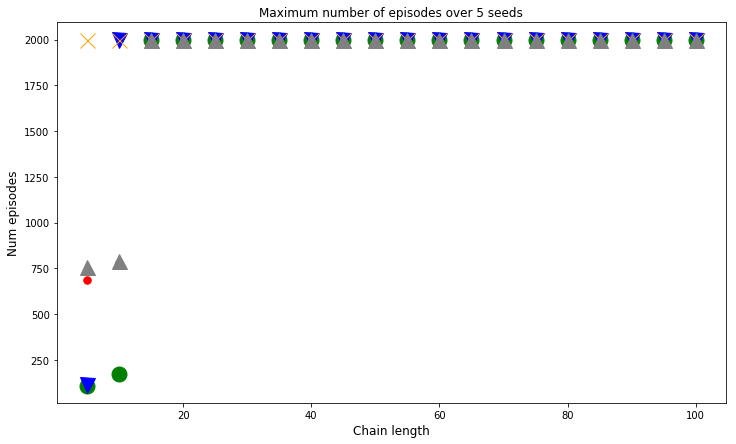

In [39]:
plt.figure(figsize=(12,7))
plt.xlabel('Chain length', fontsize=12)
plt.ylabel('Num episodes', fontsize=12)
plt.title('Maximum number of episodes over 5 seeds')

markers = ['.', 'o', 'v', 'x', '^']
colors = ['red', 'green', 'blue', 'orange', 'gray']

for i, ind in enumerate(id_to_plot):#, stat in enumerate(all_stats[:1]):
    stat = all_stats[ind]
    n = stat.shape[1]
    for j in range(n):
        plt.plot(dim_range[j], stat[2][j], markers[i], color=colors[i], markersize=15)

In [ ]:
experiments_to_plot = [0,1,2,3,]

In [11]:
print_results(experiments, 'results/dqn/chain/')

eps_greedy
[[ 595.   592.   658.   627.  2000. ]
 [ 652.  1203.4  980.6 1725.4 2000. ]
 [ 722.  2000.  2000.  2000.  2000. ]]


ucb-1
[[ 109.   118.   132.   244.   211. ]
 [ 164.2  131.4  205.8 1207.2 1308.8]
 [ 370.   150.   335.  2000.  2000. ]]


ucb-2
[[ 106.   110.   115.   122.   199. ]
 [ 107.4  128.   119.6  532.2  983. ]
 [ 110.   149.   134.  2000.  2000. ]]


count_based_state_action
[[  99.    99.    99.    99.    99. ]
 [1239.6  860.   859.4  873.6  865.6]
 [2000.  2000.  2000.  2000.  2000. ]]


count_based_next_state_action
[[  99.    99.    99.    99.    99. ]
 [1239.6  860.   859.4 1619.8 1619.8]
 [2000.  2000.  2000.  2000.  2000. ]]


count_based_state
[[  99.    99.    99.    99.    99. ]
 [1239.6  860.   859.4  873.6  865.6]
 [2000.  2000.  2000.  2000.  2000. ]]


count_based_next_state
[[  99.    99.    99.    99.    99. ]
 [1239.6  860.   859.4  874.2  865.6]
 [2000.  2000.  2000.  2000.  2000. ]]


eps_greedy_count_based_state_action
[[ 594.   587.   687.  166

FileNotFoundError: [Errno 2] No such file or directory: 'results/dqn/chain/eps_greedy_count_based_state.npy'